# Figure S9: Antarctic Sea Ice Extent

This notebook will reproduce Figure S9 from the supplementary info of *Ocean Heat Content responses to changing Anthropogenic Aerosol Forcing Strength: regional and multi-decadal variability*, E. Boland et al. 2022 ([pre-print](https://doi.org/10.1002/essoar.10511062.1)). This will require utils.py (expects to find it in ../code) and input datafiles (expects to find them in ../data_in) to run - please see the README for details.

The data files loaded were created as follows:
- Sea Ice Concentration files were analysed to calculate the sea ice extent as the area covered by SI concentrations >0.15 for latitudes south of 40S in calc_SH_SIE.py, producing SIE_SH.nc

Please attribute any plots or code from this notebook using the DOI from Zenodo: [10.5281/zenodo.6418479](https://doi.org/10.5281/zenodo.6418479)

E Boland Aug 2022 [emmomp@bas.ac.uk](email:emmomp@bas.ac.uk)

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0,'../code/')
import utils

In [2]:
# Directories for saving plots and finding input data
figs_dir = '../figs/' # Where you want the plots saved
data_dir='../data_in/' # Where the input data is (see README)

# Experiment info, don't alter
exps=['historical0p2','historical0p4','historical0p7','historical1p0','historical1p5']
exp_names=['0.2','0.4','0.7','1.0','1.5']
smurphs_cmap= [(255/255, 0 , 0),(255/255 ,165/255,   0),(190/255, 190/255, 190/255),(0   ,0 ,255/255),(160 /255, 32/255 ,240/255)]

In [3]:
sie=xr.open_dataarray(data_dir+'SIE_SH.nc')

In [4]:
sie_plot={}
sie_plot['sep']=sie.where(sie.time.dt.month==9,drop=True)
sie_plot['mar']=sie.where(sie.time.dt.month==3,drop=True)

In [6]:
tt=sie_plot['mar'].time
tt_index=tt.dt.year+(tt.dt.dayofyear-1)/365.25
sie_plot['sep']['time']=tt_index
sie_plot['mar']['time']=tt_index
month_label={'sep':'Sept','mar':'March'}

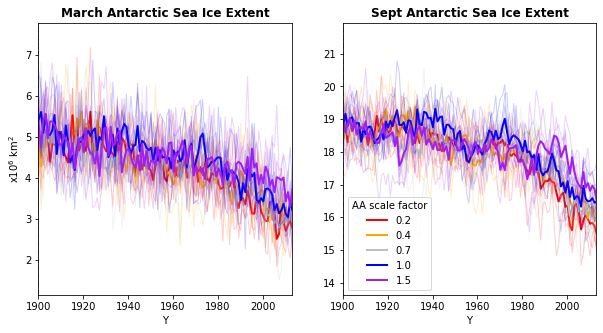

In [7]:
%matplotlib inline
fig=plt.figure(figsize=[10,5])
cmap=smurphs_cmap

for np,month in enumerate(['mar','sep']):
    pp=[]
    ax=fig.add_subplot(1,2,1+np)
    for ie,exp in enumerate(exps):
        (sie_plot[month]/1e6).sel(exp=exp).plot(ax=ax,x='time',hue='run',color=cmap[ie],linewidth=1,add_legend=False,alpha=0.2)
        pp.append((sie_plot[month]/1e6).mean(dim='run').sel(exp=exp).plot(x='time',color=cmap[ie],linewidth=2,add_legend=False)[0])
    plt.axvline(1900,color='grey',ls='--')
    plt.xlim([1900,2013])
    if np==0:
        plt.ylabel('x10$^6$ km$^2$')
    else:
        plt.ylabel('')
    plt.xlabel('Y')
    plt.title('{} Antarctic Sea Ice Extent'.format(month_label[month]),fontweight='bold')
plt.legend(pp,exp_names,title='AA scale factor')

plt.savefig(figs_dir+'SIE_SH.png',bbox_inches='tight')